**Flying High and Flying Low: Budget and Charter Flights at San Francisco International Airport**

This project examines two datasets from the San Francisco open data portal: [Air Traffic Landings Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t) and [Air Traffic Passenger Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg) in order to determine how changing income inequality in the Bay Area has impacted the prevalence of budget vs. charter airlines at SFO. This story asks four main questions:
1. Has the number of budget flights increased or decreased with time?
2. Has the number of charter flights increased or decreased with time?
3. Has the number of passengers flying via budget airlines increased or decreased with time?
4. Has the number of passengers flying via charter airlines increased or decreased with time?

The [Air Traffic Landings Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t) dataset contains monthly information about how many flights a specific airline is operating. I used this dataset to answer research questions 1 and 2.

The [Air Traffic Passenger Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg) dataset contains monthly information about how many passengers a specific airline is transporting. I used this dataset to answer research questions 3 and 4.

**Results:**
1. I found that the number of budget flights as well as the number of passengers flying via budget flights has decreased.
2. I found that the number of charter flights as well as the number of passengers flying via charter flights has increased.

Because the airport has limited space, the allocation of that space to individual flights can reflect local priorities. More and more of SFO's space is being allocated to chartered flights over budget flights, which reflects San Francisco's growing wealth inequality. As the technology industry funnels more and more wealth into the Bay Area, the wealthy patrons of charter airlines are better able to exploit the limited resources at SFO than the less wealthy patrons of budget airlines.

**Methodology**
Step 1: Manual Creation of a List of Budget and Charter Airlines

In order to get a comprehensive list of the airlines at SFO, I used four datasets available on the San Francisco open data portal: [Air Traffic Landings Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t), [Air Traffic Passenger Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg), [Aircraft Parking Activity Records at SFO](https://data.sfgov.org/Transportation/Aircraft-Parking-Activity-Records-at-SFO/5rkh-waic), and [Aircraft Tail Numbers and Models at SFO](https://data.sfgov.org/Transportation/Aircraft-Tail-Numbers-and-Models-at-SFO/u7dr-xm3v). Each entry in the datasets lists an airline, and I aggregated the unique entries in each dataset to obtain a comprehensive look at every known airline operating out of the airport. Lastly, for each unique airline, I tagged the ones that were charter or budget airlines. For a peek at that database, see below:

In [1]:
import pandas as pd
budget_vs_charter_airlines = 'data/raw/charter_and_budget_airlines.csv'
airlines = pd.read_csv(budget_vs_charter_airlines)
airlines.head(10)

,Airline,Charter?,Low Cost?
0,ATA Airlines,False,True
1,AirTran Airways,False,True
2,Frontier Airlines,False,True
3,Independence Air,False,True
4,Sun Country Airlines,False,True
5,Miami Air International,True,False
6,Spirit Airlines,False,True
7,Xtra Airways,True,False
8,Allegiant Air,False,True
9,Air Berlin,False,True


From there, I created a list of every budget airline and every charter airline operating out of SFO.

Step 2: Scripted cleaning of [Air Traffic Landings Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t) and [Air Traffic Passenger Statistics](https://data.sfgov.org/Transportation/Air-Traffic-Passenger-Statistics/rkru-6vcg) databases

I filtered the two databases using the two lists for chartered and budget airlines in order to create four databases: Budget Airline Landings, Charter Airline Landings, Budget Airline Passengers, and Charter Airline Passengers. For a peek at those databases, see below:

In [2]:
print("BUDGET LANDINGS")
budget_landings = pd.read_csv('data/processed/clean_budget_Air_Traffic_Landings_Statistics.csv')
budget_landings.head(10)

BUDGET LANDINGS


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
2,200507,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Passenger,Narrow Body,Boeing,737,700,62,7936000
3,200507,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Passenger,Narrow Body,Airbus,A318,NaN,28,3458000
4,200507,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Passenger,Narrow Body,Airbus,A319,NaN,147,19771500
5,200507,Independence Air,DH,Independence Air,DH,Domestic,US,Passenger,Narrow Body,Airbus,A319,NaN,93,12815400
6,200507,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Passenger,Narrow Body,Boeing,737,800,31,4533500
7,200508,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,737,800,1,146300
8,200508,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,3,594000
9,200508,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,159,35616000


In [3]:
print("BUDGET PASSENGERS")
budget_passengers = pd.read_csv('data/processed/clean_budget_Air_Traffic_Passenger_Statistics.csv')
budget_passengers.head(10)

BUDGET PASSENGERS


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201811,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,1
1,201803,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,10
2,201810,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,10
3,201801,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,11
4,201802,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,14
5,201804,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,19
6,201807,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,31
7,201809,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,32
8,201805,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,39
9,201411,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Enplaned,Low Fare,Terminal 1,B,40


In [4]:
print("CHARTER LANDINGS")
charter_landings = pd.read_csv('data/processed/clean_charter_Air_Traffic_Landings_Statistics.csv')
charter_landings.head(10)

CHARTER LANDINGS


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200510,Miami Air International,GL,Miami Air International,GL,International,Canada,Passenger,Narrow Body,Boeing,727,200,1,164000
1,200608,Xtra Airways,XP,Xtra Airways,XP,Domestic,US,Passenger,Narrow Body,Boeing,737,400,1,124000
2,200707,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,400,1,121000
3,200710,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,800,1,146000
4,200804,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,800,1,146000
5,200805,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,800,1,146000
6,200807,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,400,1,121000
7,200808,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,800,1,146000
8,200905,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,800,2,291984
9,201103,Miami Air International,GL,Miami Air International,GL,Domestic,US,Passenger,Narrow Body,Boeing,737,800,1,145992


In [5]:
print("CHARTER PASSENGERS")
charter_passengers = pd.read_csv('data/processed/clean_charter_Air_Traffic_Passenger_Statistics.csv')
charter_passengers.head(10)

CHARTER PASSENGERS


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,201309,"Atlas Air, Inc",5Y,"Atlas Air, Inc",5Y,Domestic,US,Thru / Transit,Other,Other,Other,3
1,201309,"Atlas Air, Inc",5Y,"Atlas Air, Inc",5Y,Domestic,US,Thru / Transit,Other,Other,Other,3
2,200510,Miami Air International,GL,Miami Air International,GL,International,Canada,Deplaned,Other,International,A,28
3,200905,Miami Air International,GL,Miami Air International,GL,Domestic,US,Enplaned,Other,International,A,53
4,200905,Miami Air International,GL,Miami Air International,GL,Domestic,US,Deplaned,Other,International,A,55
5,200807,Miami Air International,GL,Miami Air International,GL,Domestic,US,Deplaned,Other,International,A,58
6,200807,Miami Air International,GL,Miami Air International,GL,Domestic,US,Enplaned,Other,International,A,60
7,200707,Miami Air International,GL,Miami Air International,GL,Domestic,US,Enplaned,Other,International,A,64
8,201309,"Atlas Air, Inc",5Y,"Atlas Air, Inc",5Y,Domestic,US,Deplaned,Other,Other,Other,65
9,201309,"Atlas Air, Inc",5Y,"Atlas Air, Inc",5Y,Domestic,US,Deplaned,Other,Other,Other,65


Step 3: Manual consolidation of entries.

Each database includes multiple entries per month. To get a month-by-month look at changes in charter and budget flight data, I consolidated the entries by 'Activity Period' (each activity period represents one month) using Excel's consolidation function. Each data set included incomplete years on the early and late sides of the data, so I manually removed those rows. For a look at what those databases look like post-consolidation, I've included the Budget Landings consolidated database as an example. (The others can be found in the data/processed directory.)

In [6]:
print("BUDGET LANDINGS")
budget_landings = pd.read_csv('data/processed/budget_landings.csv')
budget_landings.head(10)

BUDGET LANDINGS


,Activity Period,Landing Count
0,2006,4476
1,2007,4762
2,2008,2969
3,2009,2739
4,2010,3371
5,2011,3969
6,2012,3694
7,2013,2768
8,2014,2502
9,2015,2843


4. Results

Let's see how it all stacks up!

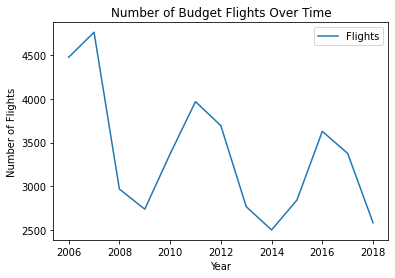

In [7]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('data/processed/budget_landings.csv','r') as csvfile:
    firstline=csvfile.readline()
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Flights')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Budget Flights Over Time')
plt.legend()
plt.show()

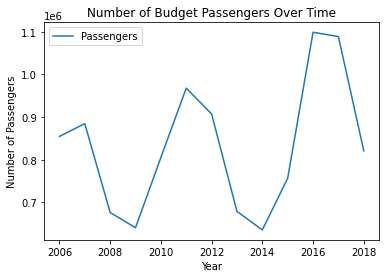

In [8]:
x = []
y = []

with open('data/processed/budget_passengers.csv','r') as csvfile:
    firstline=csvfile.readline()
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Number of Budget Passengers Over Time')
plt.legend()
plt.show()

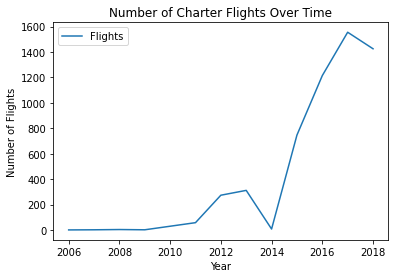

In [9]:
x = []
y = []

with open('data/processed/charter_landings.csv','r') as csvfile:
    firstline=csvfile.readline()
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Flights')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Charter Flights Over Time')
plt.legend()
plt.show()

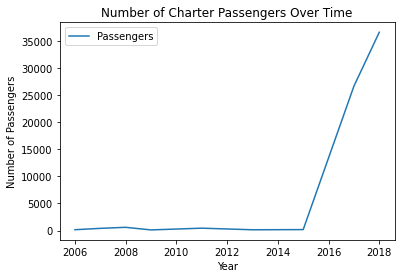

In [10]:
x = []
y = []

with open('data/processed/charter_passengers.csv','r') as csvfile:
    firstline=csvfile.readline()
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Number of Charter Passengers Over Time')
plt.legend()
plt.show()

**Takeaways**

There has been a massive increase in the number of charter flights taken from SFO, both in the number of passengers flying and the number of flights. Meanwhile, there has been a decrease in budget flights and fluctuation in the number of budget passengers. This indicates that the limited resources at SFO are being increasingly allocated to the very wealthy and very few, which raises questions about the priorities of the local government that owns and operates SFO as well as the local population that elects and oversees that government. Though the factors that shape patterns in budget and chartered flight frequency are complex, the data clearly demonstrates that shared public resources are increasingly being allocated towards the few.

TESTING THIS SECTION OUT, HOPEFULLY IT WORKS LOL

In [20]:
print("BUDGET LANDINGS")
budget_landings = pd.read_csv('data/processed/clean_budget_Air_Traffic_Landings_Statistics.csv')
budget_landings_by_year = budget_landings.groupby("Activity Period").sum()
budget_landings_by_year.head(10)

BUDGET LANDINGS


,Landing Count,Total Landed Weight
Activity Period,,
200507,530,86318400
200508,512,83410100
200509,428,67787300
200510,430,66148600
200511,395,58924300
200512,394,56726400
200601,347,49441700
200602,304,42740200
200603,341,47780700
